In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
planned_spend = pd.read_excel('toy_sales_data.xlsx', sheet_name=1)
display(planned_spend)
print(planned_spend.shape)

,month,tv_spend,digital_spend
0,2018-01-01,350000,215000
1,2018-02-01,950000,150000
2,2018-03-01,1350000,400000


(3, 3)


In [3]:
toy_sales = pd.read_excel('toy_sales_data.xlsx')
display(toy_sales)
print(toy_sales.shape)

,month,sales,tv_spend,digital_spend,trend,xmas
0,2016-01-01,3700000,600000.0,300000.00,1,0
1,2016-02-01,8900000,2880000.0,90000.00,2,0
2,2016-03-01,8200000,864000.0,427000.00,3,0
3,2016-04-01,5800000,259200.0,128100.00,4,0
4,2016-05-01,11000000,2077760.0,538430.00,5,0
5,2016-06-01,7700000,623328.0,161529.00,6,0
6,2016-07-01,10300000,2186998.4,48458.70,7,0
7,2016-08-01,7800000,656099.5,14537.61,8,0
8,2016-09-01,9500000,196829.9,804361.28,9,0
9,2016-10-01,10600000,1859049.0,241308.38,10,0


(24, 6)


In [4]:
toy_sales.dtypes

month            datetime64[ns]
sales                     int64
tv_spend                float64
digital_spend           float64
trend                     int64
xmas                      int64
dtype: object

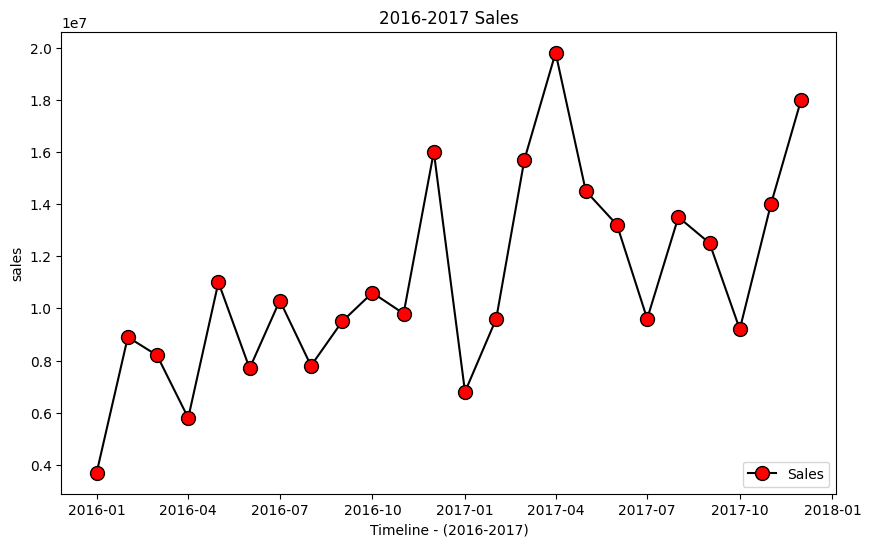

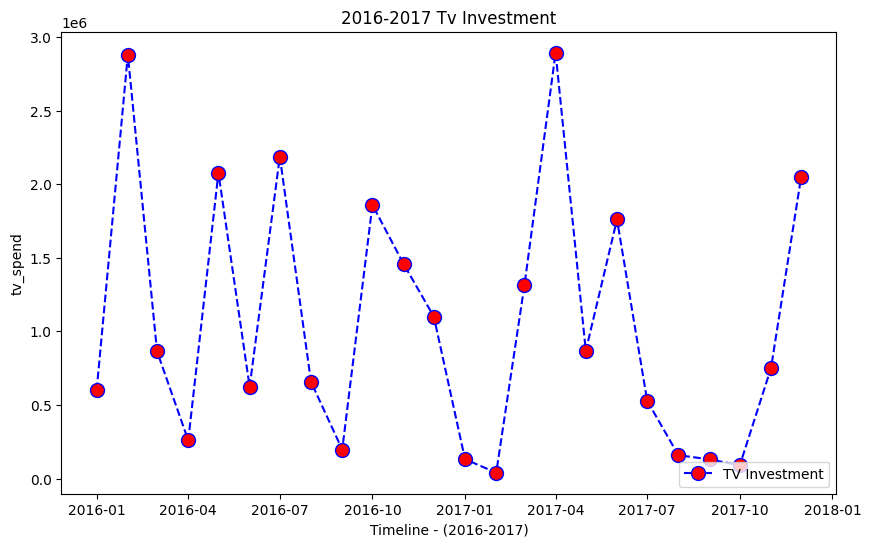

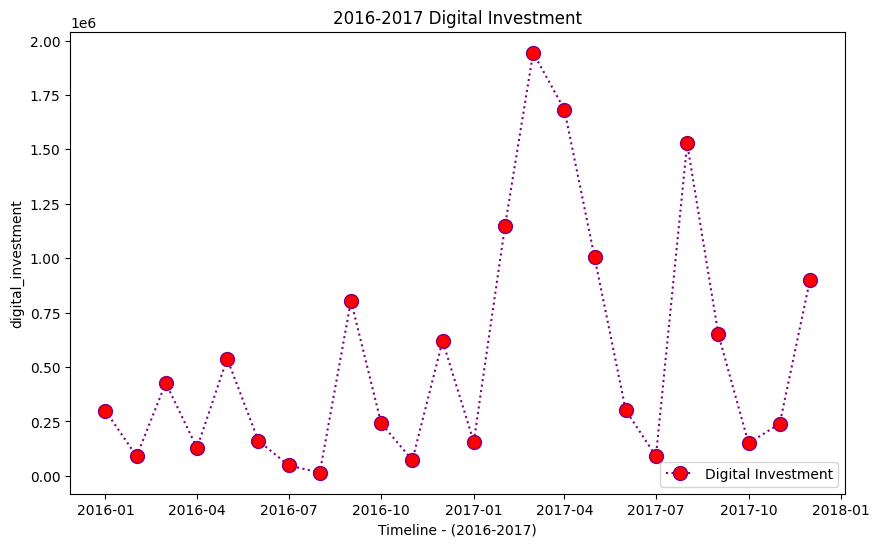

In [5]:
plt.figure(figsize=(10,6))
plt.plot(toy_sales['month'], toy_sales['sales'], linestyle='solid', color='black', marker='o', markerfacecolor='red', markersize=10, label='Sales')
plt.xlabel('Timeline - (2016-2017)')
plt.ylabel('sales')
plt.title('2016-2017 Sales')
plt.legend(loc='lower right')

plt.figure(figsize=(10,6))
plt.plot(toy_sales['month'], toy_sales['tv_spend'], linestyle='dashed', color='blue', marker='o', markerfacecolor='red', markersize=10, label='TV Investment')
plt.xlabel('Timeline - (2016-2017)')
plt.ylabel('tv_spend')
plt.title('2016-2017 Tv Investment')
plt.legend(loc='lower right')

plt.figure(figsize=(10,6))
plt.plot(toy_sales['month'], toy_sales['digital_spend'], linestyle='dotted', color='purple', marker='o', markerfacecolor='red', markersize=10, label='Digital Investment')
plt.xlabel('Timeline - (2016-2017)')
plt.ylabel('digital_investment')
plt.title('2016-2017 Digital Investment')
plt.legend(loc='lower right')

In [6]:
# Selecting only Sales, Tv and Digital spend:
toy_sales_subset = toy_sales[['sales','tv_spend','digital_spend']]

# Correlation matrix:
correlation_matrix = toy_sales_subset.dropna().corr()
correlation_matrix

,sales,tv_spend,digital_spend
sales,1.000000,0.440686,0.664765
tv_spend,0.440686,1.000000,0.072059
digital_spend,0.664765,0.072059,1.000000


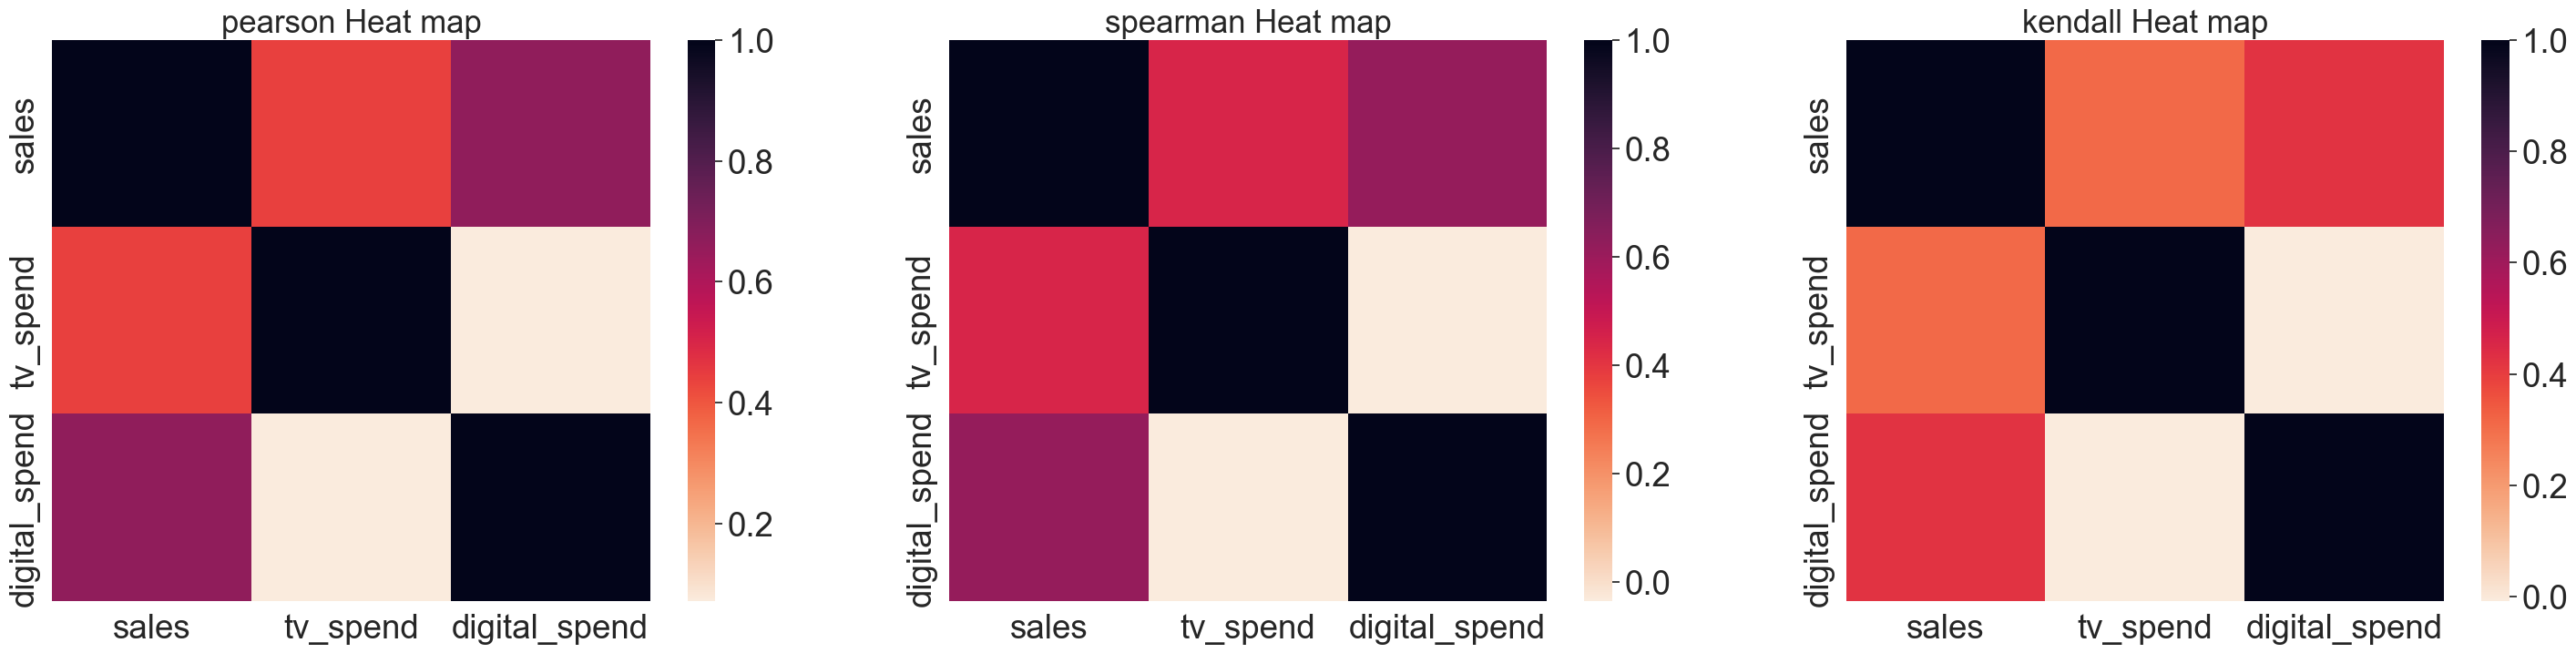

In [7]:
# List of correlation methods:
correlation_methods = ['pearson','spearman','kendall']

# Heat map of correlation matrix using all 3 types of correlation methods:
plt.figure(figsize=(36,8), dpi=100)
sns.set_theme(font_scale=2.4)

for j,i in enumerate(correlation_methods):    
    plt.subplot(1, len(correlation_methods), j+1)
    
    # Correlation matrix using all three correlation methods:
    correlation_matrix = toy_sales_subset.dropna().corr(method = i)
    sns.heatmap(correlation_matrix, cmap = sns.cm.rocket_r)
    
    plt.title("{} Heat map".format(i), fontsize=25)

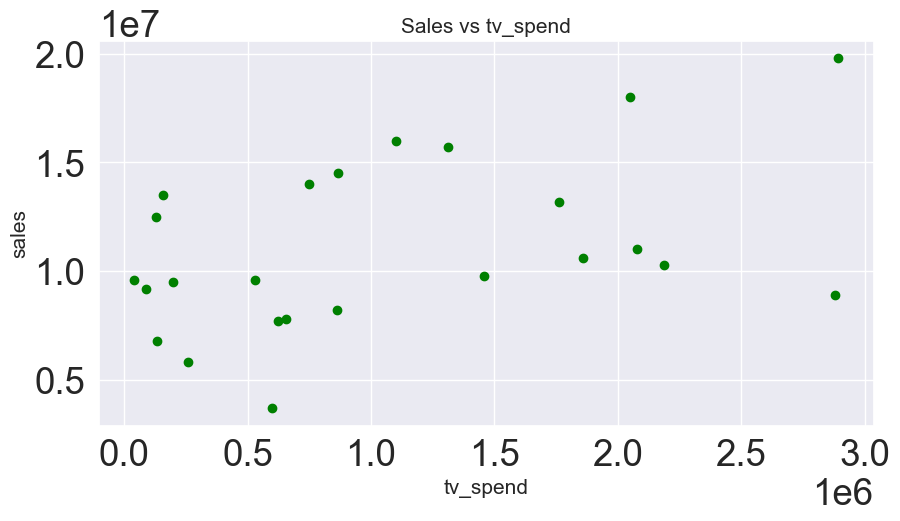

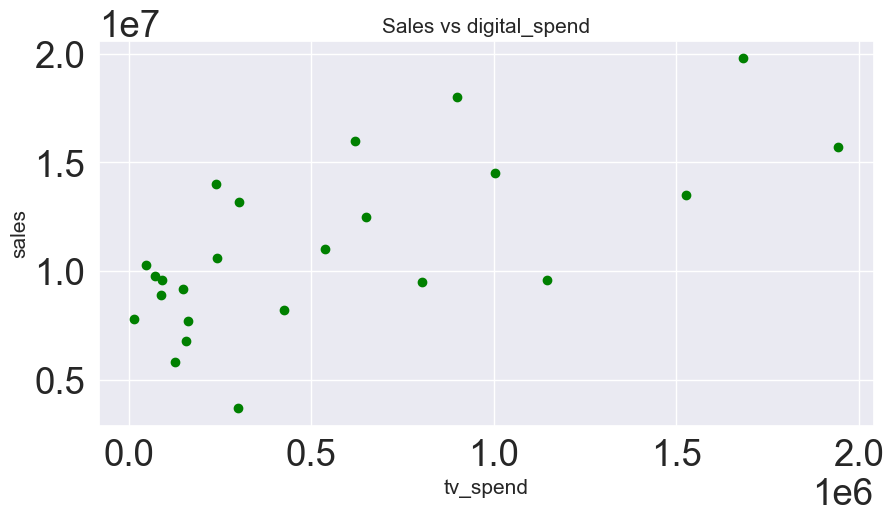

In [8]:
# drawing scatter plot:
plt.figure(figsize=(10,5), dpi=100)
plt.scatter(toy_sales['tv_spend'], toy_sales['sales'], color ="green")
plt.title('Sales vs tv_spend',fontsize=15)
plt.xlabel('tv_spend',fontsize=15)
plt.ylabel('sales',fontsize=15)
plt.show()

# drawing scatter plot:
plt.figure(figsize=(10,5), dpi=100)
plt.scatter(toy_sales['digital_spend'], toy_sales['sales'], color ="green")
plt.title('Sales vs digital_spend',fontsize=15)
plt.xlabel('tv_spend',fontsize=15)
plt.ylabel('sales',fontsize=15)
plt.show()

### Univariate analysis of Numeric variables

In [9]:
# Function to perform univariate analysis of the numeric coloumns by checking normality, skewness and kurtosis:
def univariate_analysis_numeric(df, col_name):
    
    # Taking only the column data:
    df_col =df[col_name]
    
    # Checking for Skewness and Kurtosis:
    df_col_skewness = round(df_col.skew(),2)
    df_col_kurtosis = round(df_col.kurtosis(),2)
    print('{} Skewness: {}'.format(col_name,df_col_skewness))
    print('{} Kurtosis: {}'.format(col_name,df_col_kurtosis))

    # Mean, Median and Standard Deviation:
    df_col_mean = round(df_col.mean(),2)
    df_col_median = round(df_col.median(),2)
    df_col_var = round(df_col.var(),2)
    df_col_std = round(df_col.std(),2)
    df_col_min_max = round(df_col.min(),2), round(df_col.max(),2)
    # This is one standard deviation on either sides of the mean value:
    one_std_range = round(df_col_mean - df_col_std,2), round(df_col_mean + df_col_std,2) 
    print('{} mean: {}, median: {}'.format(col_name, df_col_mean, df_col_median))
    print('{} standard deviation: {}, one_std_range: {}'.format(col_name, df_col_std, one_std_range))
    print('{} variance: {}'.format(col_name, df_col_var))
    print('{} Min and Max: {}'.format(col_name, df_col_min_max))
    
    # Sub-plots:
    fig, axes = plt.subplots(1,3,figsize=(20,5), dpi=100)
    
    # Normality check (visual) - KDE Plot:
    sns.kdeplot(ax=axes[0], x=df_col, fill=True)
    sns.scatterplot(ax=axes[0], x=[df_col_mean], y=[0], color='red', label='Mean')
    sns.scatterplot(ax=axes[0], x=[df_col_median], y=[0], color='green', label='Median')
    sns.lineplot(ax=axes[0], x=list(one_std_range), y=[0,0], color='black', label='std_range')
    axes[0].set_title('{} - KDE'.format(col_name))
    axes[0].set_xlabel('{}'.format(col_name))
    axes[0].set_ylabel('Density')
    
    # Normality check - QQ Plot:
    sm.qqplot(df_col, line='s', ax=axes[1])
    axes[1].set_title('{} - QQ Plot'.format(col_name))
    
    # Box plot to check for outliers in the data:
    sns.boxplot(ax=axes[2], x=df_col)
    axes[2].set_title('{} - Box plot'.format(col_name))
    axes[2].set_xlabel('{}'.format(col_name))
    
    plt.show()

tv_spend Skewness: 0.71
tv_spend Kurtosis: -0.58
tv_spend mean: 1061390.57, median: 807117.5
tv_spend standard deviation: 890596.1, one_std_range: (170794.47, 1951986.67)
tv_spend variance: 793161419079.18
tv_spend Min and Max: (39358.3, 2893542.2)


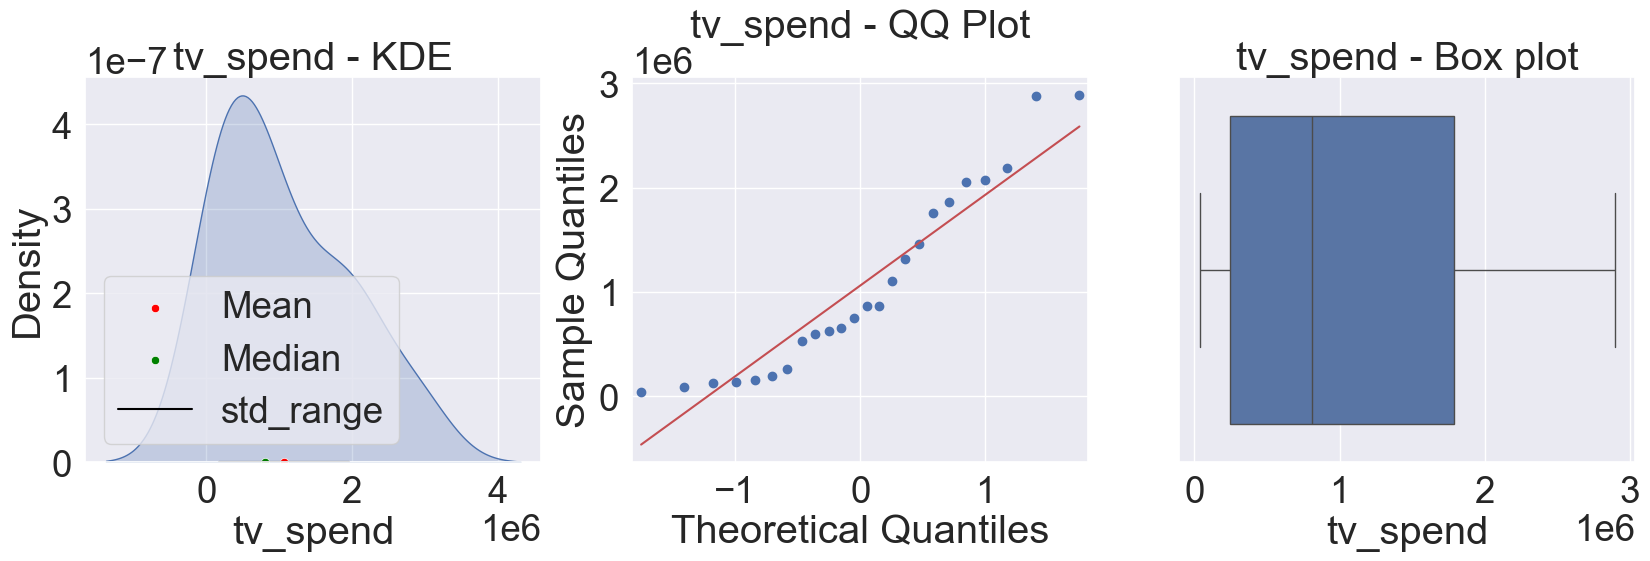

In [10]:
univariate_analysis_numeric(toy_sales, 'tv_spend')

digital_spend Skewness: 1.24
digital_spend Kurtosis: 0.65
digital_spend mean: 551750.84, median: 300745.16
digital_spend standard deviation: 556089.41, one_std_range: (-4338.57, 1107840.25)
digital_spend variance: 309235426369.28
digital_spend Min and Max: (14537.61, 1944086.38)


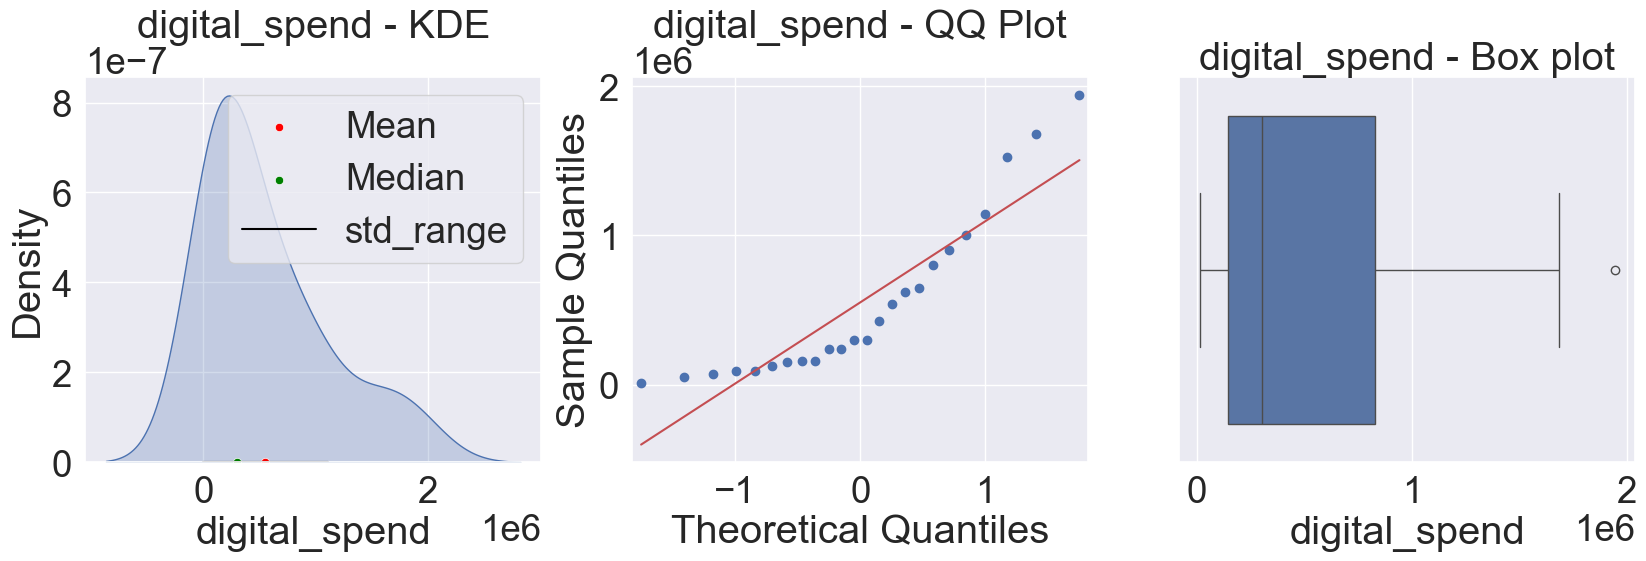

In [11]:
univariate_analysis_numeric(toy_sales, 'digital_spend')

sales Skewness: 0.44
sales Kurtosis: -0.07
sales mean: 11070854.17, median: 10050000.0
sales standard deviation: 3905706.6, one_std_range: (7165147.57, 14976560.77)
sales variance: 15254544032155.8
sales Min and Max: (3700000, 19800000)


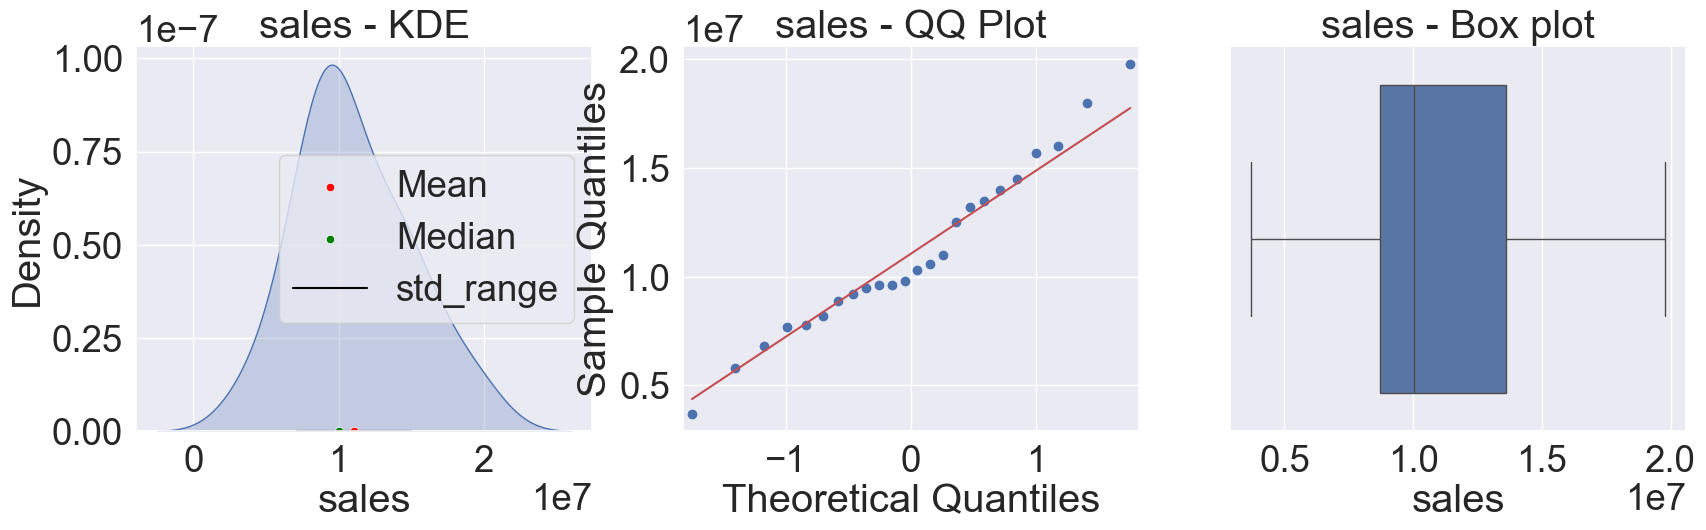

In [12]:
univariate_analysis_numeric(toy_sales, 'sales')

### Data Pre-processing

In [13]:
toy_sales = toy_sales.drop(['trend'], axis=1)
toy_sales

,month,sales,tv_spend,digital_spend,xmas
0,2016-01-01,3700000,600000.0,300000.00,0
1,2016-02-01,8900000,2880000.0,90000.00,0
2,2016-03-01,8200000,864000.0,427000.00,0
3,2016-04-01,5800000,259200.0,128100.00,0
4,2016-05-01,11000000,2077760.0,538430.00,0
5,2016-06-01,7700000,623328.0,161529.00,0
6,2016-07-01,10300000,2186998.4,48458.70,0
7,2016-08-01,7800000,656099.5,14537.61,0
8,2016-09-01,9500000,196829.9,804361.28,0
9,2016-10-01,10600000,1859049.0,241308.38,0


In [14]:
y = toy_sales['sales']
X = toy_sales.drop(['sales','month'], axis=1)

# Independent variables:
display(X.head())

# Dependent variable:
print(y)

,tv_spend,digital_spend,xmas
0,600000.0,300000.0,0
1,2880000.0,90000.0,0
2,864000.0,427000.0,0
3,259200.0,128100.0,0
4,2077760.0,538430.0,0


0      3700000
1      8900000
2      8200000
3      5800000
4     11000000
5      7700000
6     10300000
7      7800000
8      9500000
9     10600000
10     9800000
11    16000500
12     6800000
13     9600000
14    15700000
15    19800000
16    14500000
17    13200000
18     9600000
19    13500000
20    12500000
21     9200000
22    14000000
23    18000000
Name: sales, dtype: int64


In [15]:
# # Scaling the data to a common scale:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_scaled

In [16]:
reg_model = LinearRegression()
reg_model = reg_model.fit(X,y)
reg_model

LinearRegression()

In [17]:
# P-values:
mod = sm.OLS(y,X)
mod_p_values = mod.fit()
p_values = mod_p_values.summary2().tables[1]['P>|t|']
print('P-Values:\n',p_values)

print('\n-------------\n')

# pair the feature names with the coefficients
print('Intercept: ', reg_model.intercept_)
print(list(zip(X, reg_model.coef_)))

print('\n-------------\n')

# Summary:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

P-Values:
 tv_spend         0.000077
digital_spend    0.000038
xmas             0.194255
Name: P>|t|, dtype: float64

-------------

Intercept:  6780917.981793828
[('tv_spend', 1.478957519593582), ('digital_spend', 4.223732041665743), ('xmas', 4676843.331241792)]

-------------

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     16.04
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.50e-05
Time:                        16:50:50   Log-Likelihood:                -383.11
No. Observations:                  24   AIC:                             774.2
Df Residuals:                      20   BIC:                             778.9
Df Model:                           3                                         
Covarianc

In [18]:
y_pred = reg_model.predict(X)
y_pred

array([ 8935412.1060497 , 11420451.52197326,  9862270.86051396,
        7705323.84540987, 12128020.80089867,  8385048.82752528,
       10220072.27470043,  7812664.24008666, 10469427.55389095,
       10549594.41616521,  9242582.70508186, 15705261.03578714,
        7636027.59263953, 11683556.12989316, 16932325.48315005,
       18169839.18617416, 12309460.41042791, 10657916.97076112,
        7944017.62354945, 13465445.96639828,  9719749.61176755,
        7547583.96480711,  8903207.90813632, 18295238.96421237])

In [19]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
0,3700000,8.935412e+06
1,8900000,1.142045e+07
2,8200000,9.862271e+06
3,5800000,7.705324e+06
4,11000000,1.212802e+07
5,7700000,8.385049e+06
6,10300000,1.022007e+07
7,7800000,7.812664e+06
8,9500000,1.046943e+07
9,10600000,1.054959e+07


In [20]:
from sklearn.metrics import r2_score
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred)) 
adjusted_r2 = 1 - ( 1-reg_model.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )


print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('Adjusted R2:', adjusted_r2)

Mean Absolute Error: 1547147.3271869563
Mean Square Error: 4291214505953.6597
Root Mean Square Error: 2071524.6814734454
Adjusted R2: 0.6624312469589653


### Calculating ROI of TV spend:

In [21]:
toy_sales['ROI'] = ((toy_sales['sales'] - toy_sales['tv_spend']) / toy_sales['tv_spend']) * 100
toy_sales

,month,sales,tv_spend,digital_spend,xmas,ROI
0,2016-01-01,3700000,600000.0,300000.00,0,516.666667
1,2016-02-01,8900000,2880000.0,90000.00,0,209.027778
2,2016-03-01,8200000,864000.0,427000.00,0,849.074074
3,2016-04-01,5800000,259200.0,128100.00,0,2137.654321
4,2016-05-01,11000000,2077760.0,538430.00,0,429.416294
5,2016-06-01,7700000,623328.0,161529.00,0,1135.304687
6,2016-07-01,10300000,2186998.4,48458.70,0,370.965137
7,2016-08-01,7800000,656099.5,14537.61,0,1088.844070
8,2016-09-01,9500000,196829.9,804361.28,0,4726.502478
9,2016-10-01,10600000,1859049.0,241308.38,0,470.184003


### Predictions for Planned Spend 2018:

In [27]:
planned_spend['xmas'] = [0,0,0]
planned_spend

,month,tv_spend,digital_spend,xmas,sales
0,2018-01-01,350000,215000,0,1.288350e+07
1,2018-02-01,950000,150000,0,8.819487e+06
2,2018-03-01,1350000,400000,0,1.046700e+07


In [28]:
planned_spend_X = planned_spend[['tv_spend','digital_spend','xmas']]

y_pred_planned = reg_model.predict(planned_spend_X)
y_pred_planned

array([ 8206655.50260972,  8819487.43165759, 10467003.44991146])

In [29]:
planned_spend['sales'] = y_pred_planned
planned_spend

,month,tv_spend,digital_spend,xmas,sales
0,2018-01-01,350000,215000,0,8.206656e+06
1,2018-02-01,950000,150000,0,8.819487e+06
2,2018-03-01,1350000,400000,0,1.046700e+07
